Importing all of the modules that I need to visualize phylogenetic trees and make the plots I want. 

In [ ]:
from Bio import Phylo
from Bio import SeqIO
import matplotlib.pyplot as plt


The code below uses phylo to import "tree.nwk" and visualize it with BioPhylo's "Phylo.draw" function. 

In [ ]:
tree = Phylo.read(r'C:\Users\ehurt\Desktop\tree.nwk','newick')


Phylo.draw(tree)


The code below imports my sequences into the script. "md" is a dictionary that will store all of the sequence ID's as the keys for each ID's sequence. 'lengths' will have each sequence ID be the key for its sequence length. The for loop simply populates the lengths and md dictionaries using the fasta file imported using SeqIO. 

In [ ]:
sequences = SeqIO.parse(r'C:\Users\ehurt\Desktop\seqs.aligned.fa', 'fasta')
md = {}
lengths = {}
for seq_record in sequences:
    tempkey = seq_record.id
    tempseq = seq_record.seq
    md[tempkey] = tempseq
    lengths[tempkey] = 0

These lists contain the members of each cluster that I identified by inputting the seq.aligned.fa file into FastTree and visualizing the tree.nwk file using Phylo.draw(tree)

In [ ]:
c1 = ['hu.31', 'hu.32', 'hu.14']
c2 = ['hu.46', 'hu.44', 'hu.48', 'hu.43']
c3 = ['rh.55', 'rh.48', 'rh.62', 'cy.2', 'rh.54']
c4 = ['rh.35', 'rh.36', 'rh.37']
c5 = ['cy.3','cy.6','cy.4', 'cy.5', 'rh.13']
c6 = ['rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42', 'rh.2']
c7 = ['rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6']
c8 = ['pi.2', 'pi.3', 'pi.1']
c9 = ['rh.52', 'rh.58']
c10 = ['rh.64', 'rh.53', 'rh.61']
c11 = ['rh.49', 'rh.51', 'rh.57']
c12 = ['hu.39', 'rh.50']
c13 = ['rh.43']


The following code creates a list of all of the lists of ID's within each cluster which I will iteratre through later to count the GC/AT content of each sequence. The empty "output_list_a" and "output_list_g" lists are being created so that they can later store the AT and GC content of each cluster, respectively.

In [ ]:
master_list = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10, c11, c12, c13]
output_list_a = [None] * len(master_list)
output_list_g = [None] * len(master_list)

The following code's logic is as follows: 

For each cluster in the "master_list" generated previously, create a temporary list of ID's (cluster_id_list). Also, begin a count of all of the AT's and GC's in the set of clusters referred to by the list of ID's (cluster_AT_totalcount and cluster_GC_totalcount). Also, set a total base pair count equal to 0 (total_bps). Also, set the total number of replicates that exist per position (total_positions) to the total number of sequences, which is just the length of the temporary cluster_id_list list. Then, set up lists of n zeros (ATc_pos and GCc_pos) , where n is equal to the number of positions in the aligned reads of the clusters, all of which will contain the same number of reads since indels in sequences besides the longest sequence are just replaced with '-'. 

Then, for each list of ID's (for read in range(0, len(cluster_id_list)):...), I begin a read_length counter as equal to zero, and label the id for which the sequence is currently being measured for length as the "relevant_id". Then, I set the sequence corresponding to that ID as the "relevant_seq" by calling the sequence corresponding to the ID's matching key in the previously established 'md' dictionary. 

The next for loop iterates over each base pair in the sequence and counts it as an A/T, G/C, or neither (a dash), simulataneously counting up all of the base pairs in the sequence (excluding the dashes) as well as the individual GC AT content. 

In [ ]:
for l in range(0,len(master_list)):
    cluster_id_list = master_list[l]
    cluster_AT_totalcount = 0
    cluster_GC_totalcount = 0
    total_bps = 0
    total_positions = len(cluster_id_list)
    ATc_pos = [0] * len(md[cluster_id_list[0]])
    GCc_pos = [0] * len(md[cluster_id_list[0]])

    for read in range(0, len(cluster_id_list)):
        read_length = 0
        relevant_id = cluster_id_list[read]
        relevant_seq = md[relevant_id]

        for bp in range(0, len(relevant_seq)):
            if relevant_seq[bp] == 'A' or relevant_seq[bp] == 'T':
                cluster_AT_totalcount +=1
                ATc_pos[bp] += 1
                lengths[relevant_id]+=1

            elif relevant_seq[bp] == 'G' or relevant_seq[bp] == 'C':
                cluster_GC_totalcount +=1
                GCc_pos[bp] += 1
                lengths[relevant_id] += 1
            else:

                continue

The "Atc_pos_percent" and "GCc_pos_percent" calculate the percentage AT and GC content, respectively, in each position by dividing the total number of each type of read by the total number of sequences surveyed at that position for (i.e. the number of ID's in the cluster) at each index of the list, where the lists's index corresponds to the position of each base pair. 

Then, the output_list_a and g lists are populated at the lth index with the temporary ATc_pos_percent and GCc_pos_percent lists. 

In [ ]:
ATc_pos_percent = [ x / len(cluster_id_list) for x in ATc_pos]
GCc_pos_percent = [ x / len(cluster_id_list) for x in GCc_pos]
output_list_a[l] = ATc_pos_percent
output_list_g[l] = GCc_pos_percent

The following code simply plots the percent GC and AT content of each cluster, where the indeces of "output_list_g", "output_list_a", and "str()" can be changed depending on the number of the cluster. There are 13 total clusters, so I ran the code inefficiently by just running it with the indeces 0 - 12 (inclusive of 12). 

In [ ]:
x_values = len(relevant_seq)
xcoordinates = list(range(1,x_values+1))

mpl_fig = plt.figure()
plt.bar(xcoordinates, output_list_g[12], 0.8)
plt.bar(xcoordinates, output_list_a[12],0.8,  bottom = output_list_g[12])
plt.xlabel('Position in Sequence')
plt.ylabel('% AT or % GC')
plt.title('GC and AT Content for Cluster ' + str(12))


plt.show()


The following code creates an empty list to store the lengths of each sequence in each cluster. To populate this list, I create a for loop to iterate through the master list of lists of cluster ID's, use those ID's to access the length of each cluster in the 'lengths' dictionary I created previously, and append each value to the master_list_of_cluster_lengths at separate indeces depending on the cluster's ID (the ID can be any number from 0 -12 corresponding to 13 different clusters).

The code at the end simply creates box and whisker plots to plot the variance in the sequence lengths of each cluster. 

In [ ]:
master_list_of_cluster_lengths = []
for list in master_list:
    list_of_cluster_lengths = []
    for id in list:
        list_of_cluster_lengths.append(lengths[id])
    master_list_of_cluster_lengths.append(list_of_cluster_lengths)


plt.figure()
plt.boxplot(master_list_of_cluster_lengths)
plt.xlabel('Cluster ID')
plt.ylabel('Sequence Length')

plt.show()

## Description of Images and BLAST Analysis of Sequences 

The images attached below are the images required for the analysis of the clusters' GC/AT content, the box plot figure to determine the average read lengths of each cluster and their variance, and the phylogenetic tree used to establish the members of each cluster. As the box/whisker plot suggests, all of the clusters I identified except for cluster 2 had all members possess the same sequence lengths. The members of each cluster of sequences can be identified in the code as the lists "c1 - c13", where each list represents a different cluster. Uploading the sequences onto BLAST revealed that they are all variants of the adeno-associated virus (AAV) VP1 gene. 

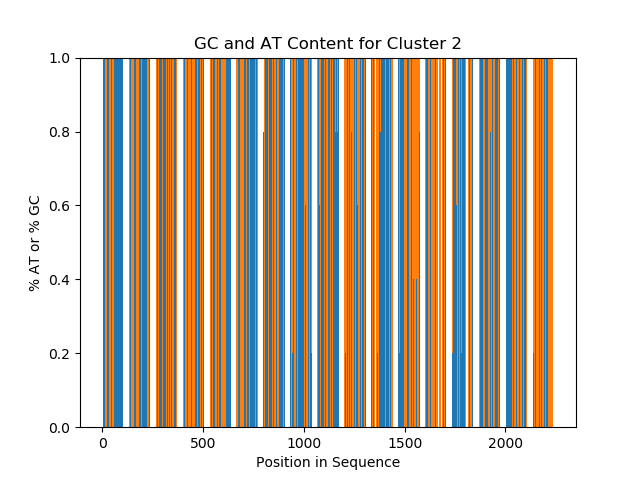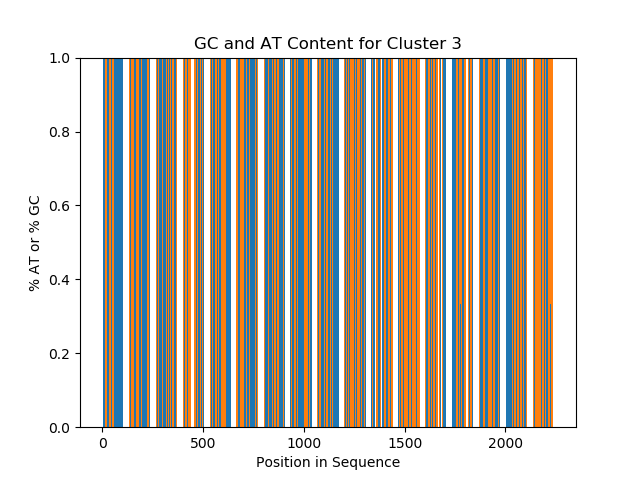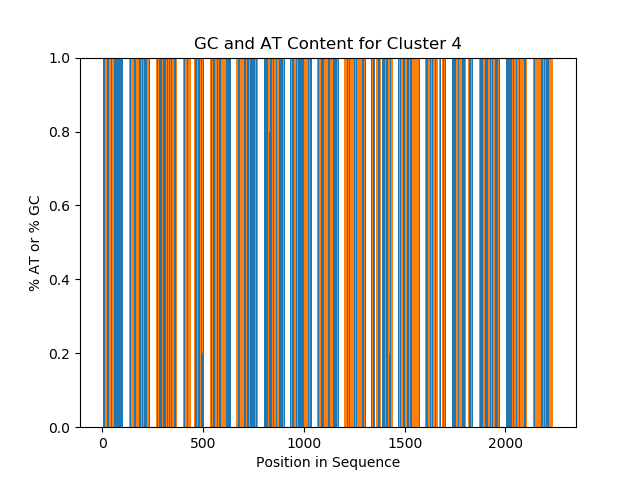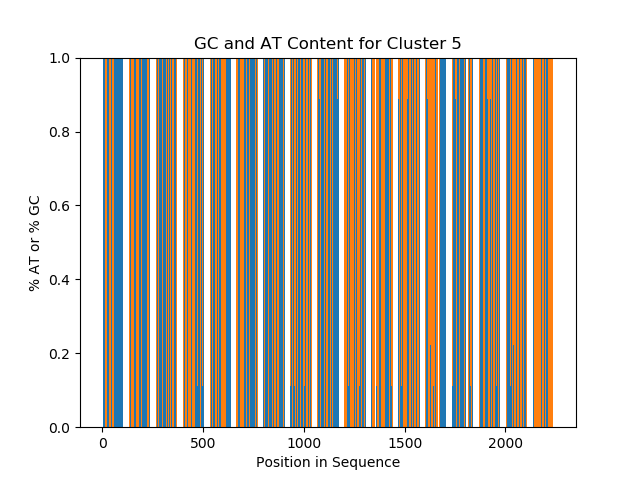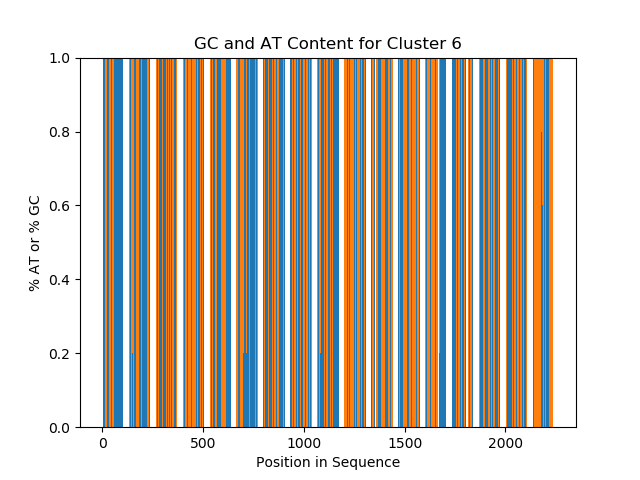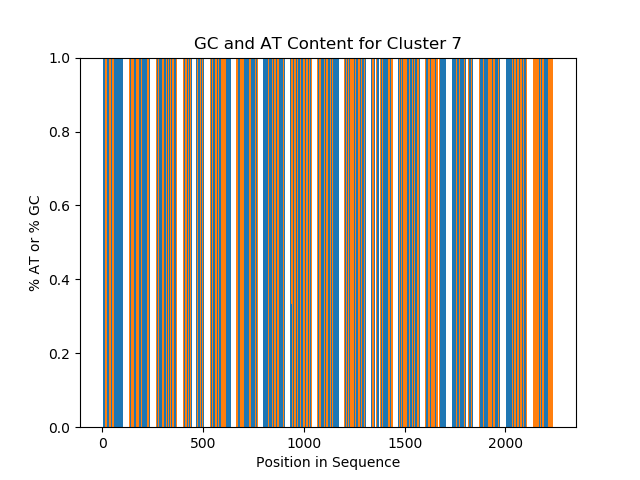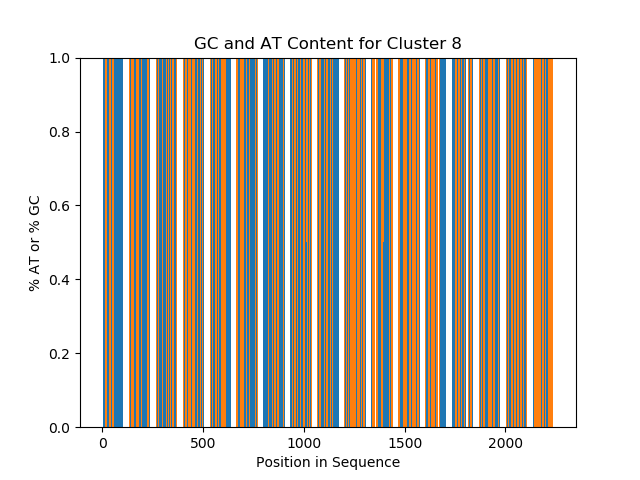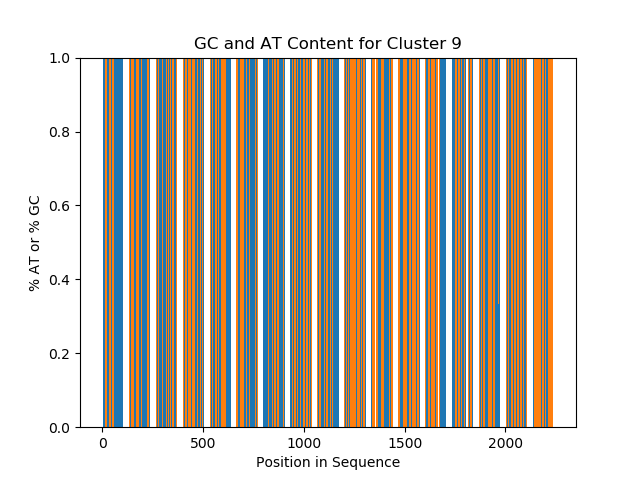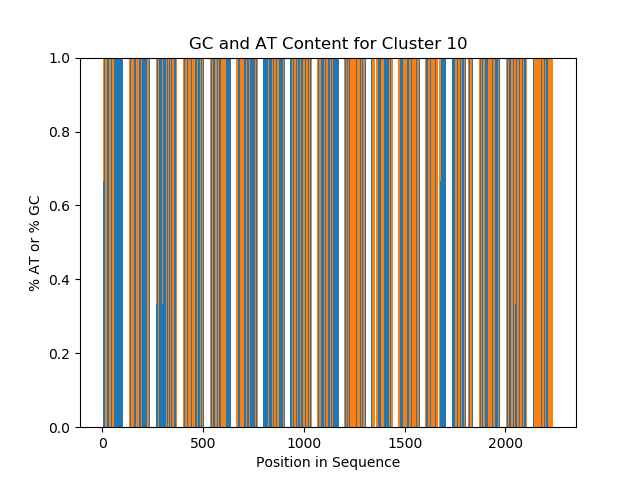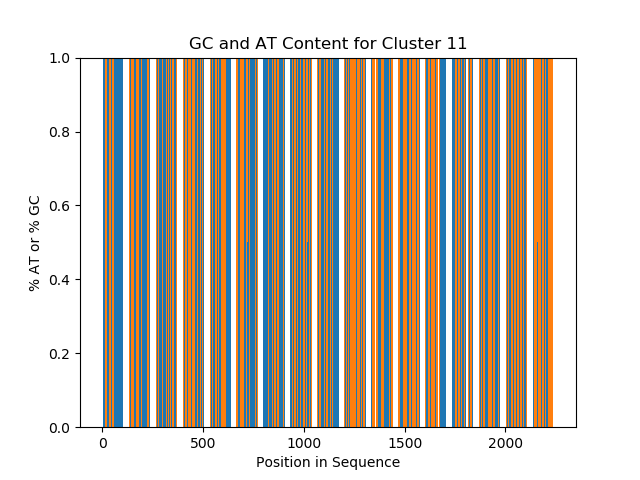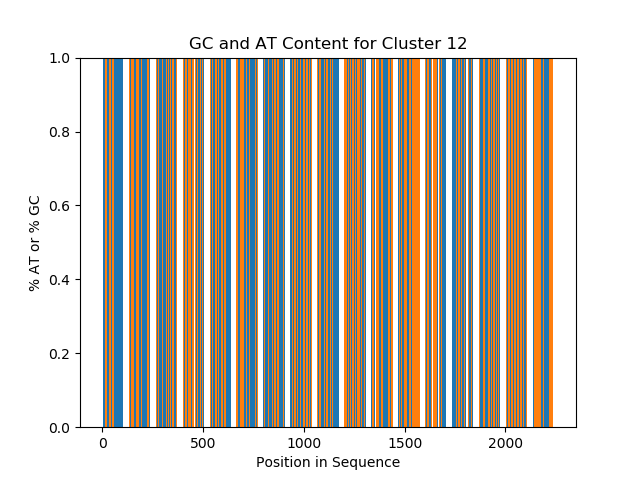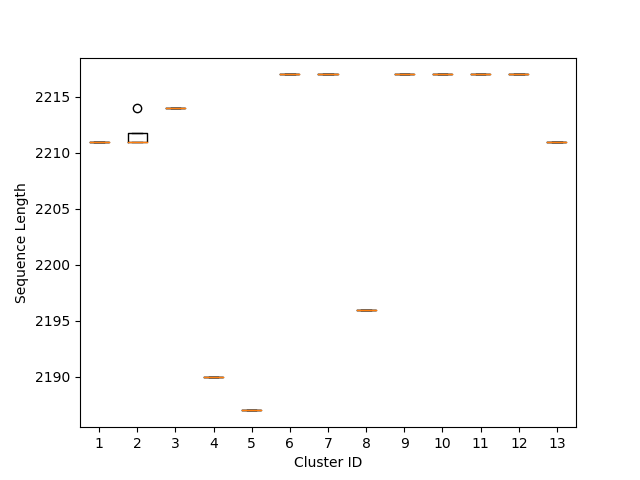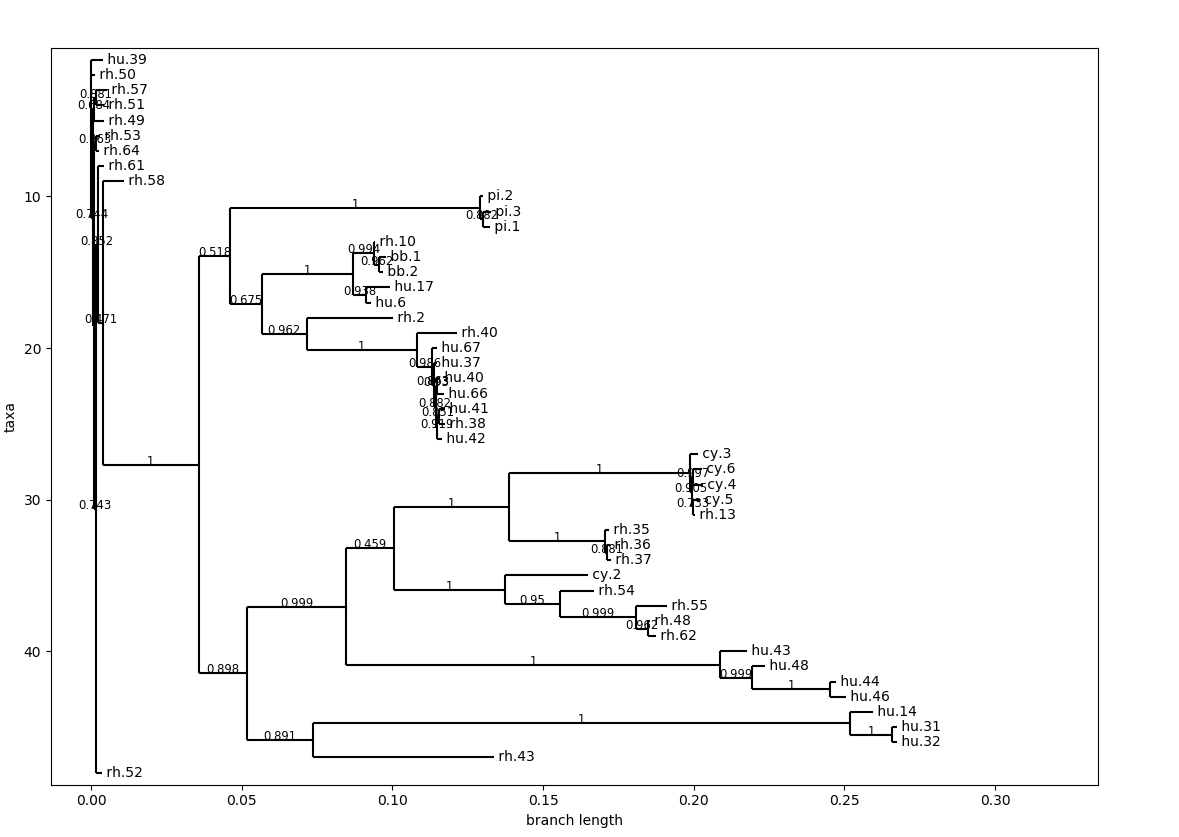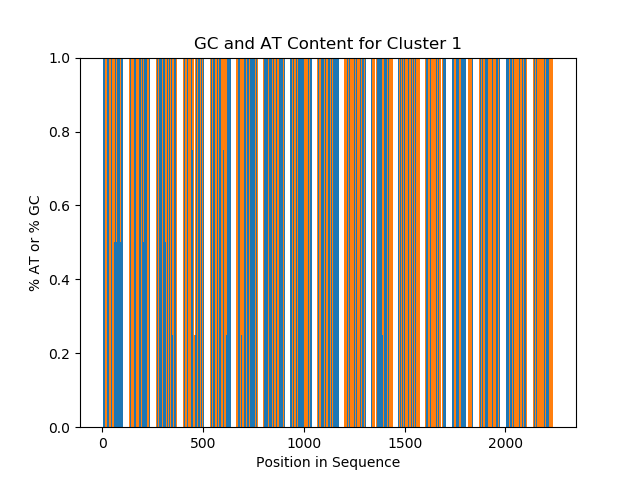

## Terminal Commands Used with Inputs and Outputs

terminal command 1: muscle -in seqs.fa -out seqs.aligned.fa 

input: seqs.fa
The tool created a multiple sequence alignment from the raw reads and sent them to a file where indels in each read were populated by dashes ('-'). 
output: seqs.aligned.fa

terminal command 2: FastTree -nt < seqs.aligned.fa > tree.nwk

input: seqs.aligned.fa
The tool created a phylogenetic tree file that can be visualized with Bio.phylo from a multiple sequence alignment produced by muscle with terminal command 1. The tree produced by Bio.Phylo is stored in the image above named 'Treee.PNG'. 
output: tree.nwk 